# ECE795 Advanced Big Data Analytics Homework 7 (Due 4/21/2022, 60 Total Points)

Please create a Dataproc cluster in Google Cloud Platform, access the master node using ssh, and answer the following questions using beeline.

In your answers, please provide necessary contents, including commands, screenshots and the outputs of the commands.

## Hive and Data Partitioning in GCP

Note: in the beeline environment in GCP, all the column names should be quoted by \`\` as the valid syntax. An example query can be found in the following.

In [ ]:
CREATE EXTERNAL TABLE jobs (
   `id` INT, 
   `title` STRING, 
   `salary` INT, 
   `posted` TIMESTAMP
 )
 ROW FORMAT DELIMITED
 FIELDS TERMINATED BY ',';

### Q1. Please describe three commands available in the beeline and explain their functionality.

In [ ]:
# Your answer

Some commands:

(1) !connect url: connect to a different Hive2 server
(2) !exit: exit the shell
(3) !help: show the full list of commands
(4) !verbose: show added details of queries

### Q2. Please download `data.csv` file from Github and put it in HDFS (any path that you want but `data.csv` should be the only file in the path).


In [ ]:
# Your answer

pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -put data.csv data/
pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -ls data
Found 1 items
-rw-r--r--   2 pengyuanzhe_ucas hadoop    3152824 2022-04-15 00:58 data/data.csv


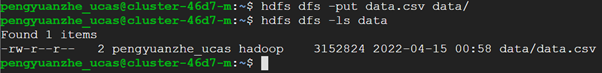

In [5]:
from IPython.display import Image, display
display(Image('/content/Q2.png', width=800, height=100))

### Q3. To connect to the Hive using beeline, please use the provided command and enter it in the terminal of the master node. In beeline environment, please create a table for the data in data.csv using approriate schema.

The names of the columns are `id`, `date`, `currency`, and `rate`. The table records the currency exchange rate for several years.

In [ ]:
beeline -u "jdbc:hive2://localhost:10000"

In [ ]:
# Your answer

beeline -u "jdbc:hive2://localhost:10000"

CREATE TABLE table_Q3 (
   `id` INT, 
   `date` STRING, 
   `currency` STRING, 
   `rate` FLOAT
)
 ROW FORMAT DELIMITED
 FIELDS TERMINATED BY ',';

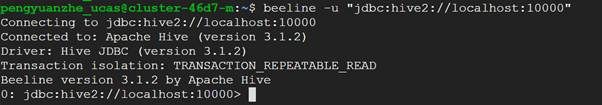

In [8]:
display(Image('/content/Q3.png', width=800, height=120))

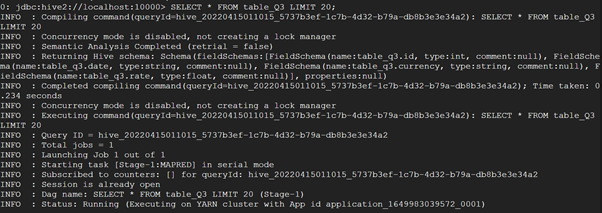

In [7]:
display(Image('/content/Q3_2.png', width=800, height=100))

### Q4. Please show the proof that the data in `data.csv` has been loaded to the created table.


In [ ]:
# Your answer

0: jdbc:hive2://localhost:10000> SELECT * FROM table_Q3 LIMIT 20;

+--------------+----------------+--------------------+----------------+
| table_q3.id  | table_q3.date  | table_q3.currency  | table_q3.rate  |
+--------------+----------------+--------------------+----------------+
| 0            | 1/3/00         | AUD/USD            | 1.5172         |
| 1            | 1/3/00         | EUR/USD            | 0.9847         |
| 2            | 1/3/00         | NZD/USD            | 1.9033         |
| 3            | 1/3/00         | GPB/USD            | 0.6146         |
| 4            | 1/3/00         | BRL/USD            | 1.805          |
| 5            | 1/3/00         | CAD/USD            | 1.4465         |
| 6            | 1/3/00         | CNY/USD            | 8.2798         |
| 7            | 1/3/00         | HKD/USD            | 7.7765         |
| 8            | 1/3/00         | INR/USD            | 43.55          |
| 9            | 1/3/00         | KRW/USD            | 1128.0         |
| 10           | 1/3/00         | MXN/USD            | 9.4015         |
| 11           | 1/3/00         | ZAR/USD            | 6.126          |
| 12           | 1/3/00         | SGD/USD            | 1.6563         |
| 13           | 1/3/00         | DKK/USD            | 7.329          |
| 14           | 1/3/00         | JPY/USD            | 101.7          |
| 15           | 1/3/00         | MYR/USD            | 3.8            |
| 16           | 1/3/00         | NOK/USD            | 7.964          |
| 17           | 1/3/00         | SEK/USD            | 8.443          |
| 18           | 1/3/00         | LKR/USD            | 72.3           |
| 19           | 1/3/00         | CHF/USD            | 1.5808         |
+--------------+----------------+--------------------+----------------+
20 rows selected (6.47 seconds)
0: jdbc:hive2://localhost:10000> 


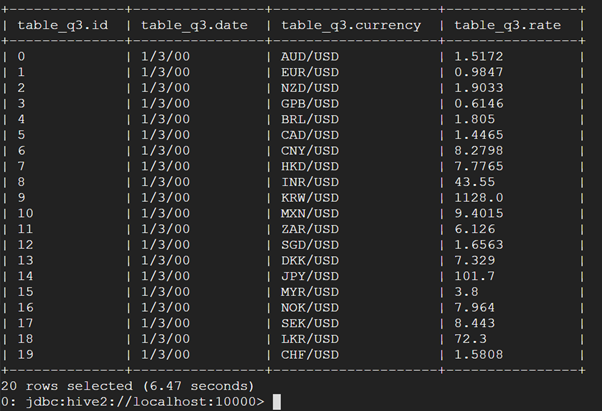

In [12]:
display(Image('/content/Q4.png', width=1000, height=600))

### Q5. Please use Hive SQL to find the currency with the highest rate between 2005 and 2010.

In [ ]:
# Your answer

SELECT currency, MAX(rate) FROM tabel_Q3
WHERE YEAR(date) >= 2005 AND YEAR(date) <= 2010
GROUP BY currency
LIMIT 1;

In [ ]:
display(Image('/content/Q5.png', width=800, height=300))

### Q6. Please create a table of the same data with data partition using `currency` as the key.

In [ ]:
# Your answer

CREATE TABLE table_Q6 (
   `id` INT, 
   `date` STRING, 
   `rate` FLOAT
)
PARTITIONED BY (`currency` STRING)
 ROW FORMAT DELIMITED
 FIELDS TERMINATED BY ',';

In [ ]:
display(Image('/content/Q6.png', width=900, height=300))

### Q7. Please discuss the advantages and disadvantages of using (1) `currency`, (2) `date`, and (3) `currency` and `date`, as the key of data partitioning.

In [ ]:
# Your answer

(1) currency:
pros: If we use currency as the key of data oartitioning, it will save time for queries that filter at currency column.
cons: It will take a longer time for queries that filter at data column.
(2) date:
pros: If we use date as the key of data oartitioning, it will save time for queries that filter at data column.
cons: It will take a longer time for queries that filter at currency column.
(3) currency and date:
pros: If we use currency and date as the key of data oartitioning, it will save time for queries that filter at currency and date columns.
cons: The data will partion by a lot of parts.